In [1]:
/*clear all
set more off
macro drop _all
set seed 8675309

set scheme dubois */

In [1]:
%set graph_format svg

In [1]:
set scheme dubois
set linesize 255
set more off
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("AGI") firstrow clear
quietly label define AGI_lab 1 "$-$30K" 2 "$30K-$48K" 3 "$48K-$75K" 4 "$75K-$110K" 5 "$110K +" 
quietly label values AGI AGI_lab
quietly rename Race_Ethnicity RE2
quietly encode RE2, generate(RE3)
quietly recode RE3 (1=4 Asian)(2=1 Black)(3=2 Latinx)(4=3 white), gen(Race_Ethnicity)

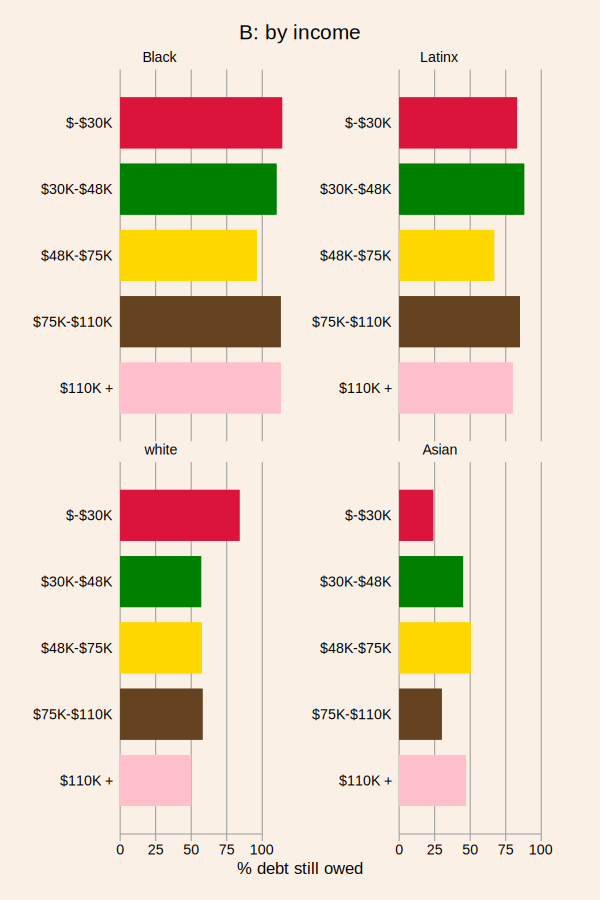

In [2]:
local opts asyvars showyvars xsize(4) ysize(6) name(AGI, replace) over(AGI, gap(30))
local opts `opts' ylabel(0(25)100, labsize(small)) ytitle("% debt still owed")
local by by(Race_Ethnicity, legend(off) title("B: by income") imargin(zero) note(""))
graph hbar Debt_ratio, `opts' `by'

In [3]:
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("EFC") firstrow clear
quietly label define EFC_lab 1 "$0" 2 "$1-$2.6K" 3 "$2.6K-$7.2K" 4 "$7.2K-$15.6K" 5 "$15.6K+" 
quietly label values EFC EFC_lab
quietly rename Race_Ethnicity RE2
quietly encode RE2, generate(RE3)
quietly recode RE3 (1=4 Asian)(2=1 Black)(3=2 Latinx)(4=3 white), gen(Race_Ethnicity)

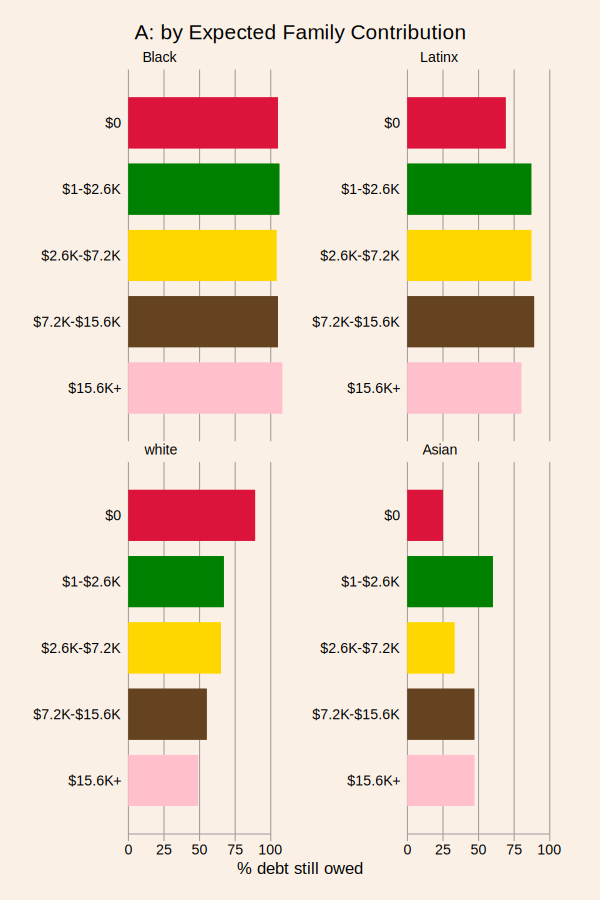

In [4]:
local over over(EFC, gap(30)) ytitle(% debt still owed) ylabel(0(25)100, labsize(small))
local asyvars asyvars showyvars xsize(4) ysize(6)  by(Race_Ethnicity, imargin(zero) legend(off)
local title title("A: by Expected Family Contribution") note("")) name(EFC, replace)

graph hbar Debt_ratio, `over' `asyvars' `title'

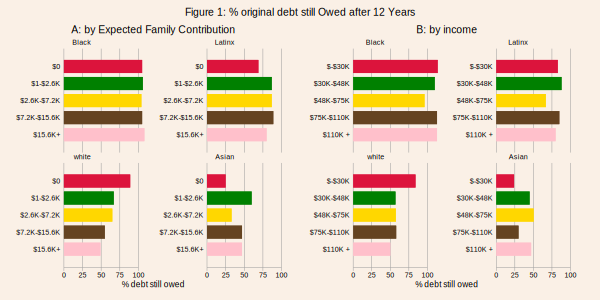

In [5]:
local imargin imargin(small) iscale(1)
local title title(Figure 1: % original debt still Owed after 12 Years)
local xsize xsize(8) ysize(4) name(AGIEFC, replace) rows(1)
graph combine EFC AGI, `imargin' `title' `xsize'

In [6]:
clear
quietly set obs `=20'
quietly gen race=4
quietly replace race=3 if _n<16
quietly replace race=1 if _n<11
quietly replace race=2 if _n<6
label define race 1 "Black" 2 "white" 3 "Latinx" 4 "Asian"
label values race race
quietly gen efc=1
quietly replace efc=2 if _n==2 | _n==7 | _n==12 | _n==17
quietly replace efc=3 if _n==3 | _n==8 | _n==13 | _n==18
quietly replace efc=4 if _n==4 | _n==9 | _n==14 | _n==19
quietly replace efc=5 if _n==5 | _n==10 | _n==15 | _n==20
quietly label define EFC_lab 1 "$0" 2 "$1-$2.6K" 3 "$2.6K-$7.2K" 4 "$7.2K-$15.6K" 5 "$15.6K+" 
quietly label values efc EFC_lab
quietly gen pcthelp=11.6368 if _n==1
quietly replace pcthelp=8.632 if _n==6
quietly replace pcthelp=13.0130 if _n==11
quietly replace pcthelp=9.3606 if _n==16
quietly replace pcthelp=15.2168 if _n==2
quietly replace pcthelp=11.3907 if _n==7
quietly replace pcthelp=15.0896 if _n==12
quietly replace pcthelp=22.6309 if _n==17
quietly replace pcthelp=16.0815 if _n==3
quietly replace pcthelp=7.6035 if _n==8
quietly replace pcthelp=15.4896 if _n==13
quietly replace pcthelp=22.4566 if _n==18
quietly replace pcthelp=21.5403 if _n==4
quietly replace pcthelp=9.5468 if _n==9
quietly replace pcthelp=18.0492 if _n==14
quietly replace pcthelp=. if _n==19
quietly replace pcthelp=25.6239 if _n==5
quietly replace pcthelp=30.1301 if _n==10
quietly replace pcthelp=16.1942 if _n==15
quietly replace pcthelp=. if _n==20
quietly rename race race2
quietly recode race2 (1=1 Black)(2=3 white)(3=2 Latinx)(4=4 Asian), gen(race)

In [7]:
set linesize 255
set more off

In [15]:
#delimit ;
local note1 note("Notes: The median Black borrower still owed 113 % of their undergraduate st"
"udent debt 12 years after starting school in the 2004 college cohort (Mille"
"r 2017). The figures above break out the median % still owed by Expected Fa"
"mily Contribution (EFC, Figure 1A) and income (Figure 1B) brackets. We do s"
"o to illustrate that the EFC formula for awarding federal and school grant "
"aid dollars does not account well for wealth deprivation in non-white house"
"holds by the racial wealth gap. Specifically, the EFC formula means tests p"
"rimarily based on income. EFC excludes most home equity and college savings"
" accounts rather than awarding additional aid to those who lack these asset"
"s. Addo, Houle, and Simon have shown that deprivation of household wealth e"
"xplains much of the gap in initial borrowing between Black and white studen"
"ts (2017). Many non-white borrowers also appear unable to repay these debts"
" in part because EFC does not account for how students from wealthier house"
"holds likely receive family assistance in repaying debts. If EFC adjusted f"
"or this, we would expect to see declines in debt still owed in higher EFC c"
"ategories in 1A. This is only the case for white households for whom income"
" and wealth are more strongly associated. Instead, the % of debt still owed" ;
local note1 `note1' " is relatively consistent across all EFC levels for other racial groups, mi"
"rroring the pattern across income brackets in 2B."
"Figure 2 shows that only white students consistently receive help with repay"
"ment from family as EFC increases. This conforms with our thesis that the ra"
"cial wealth gap prevents even higher income non-white families from helping "
"their children with repayment. Further research is needed to assess other po"
"tential dimensions of student debt disparities within racial categories incl"
"uding colorism, immigrant experiences, and ethnicities among Black, Latinx, "
"and Asian students."
"We use a Du Boisian approach to plot these disparities. Du Bois used bar"
" graphs to visualize cross tabular analyses decades before this technique b"
"ecame state of the art in the social sciences (Battle & Baptiste 2017). We "
"use a new “Du Bois” Stata scheme (Eaton et al. 2020) to automate graphing w"
"ith Du Bois’ color palette and other style elements (Starks 2019). Data is "
"from the Beginning Postsecondary Survey via Powerstats."
"*Authorship is jointly shared with authors listed alphabetically."
"Graph data / code / Stata scheme @: https://github.com/jcolond/dnd", justification(left) size(vsmall) position(3)) ;

#delimit cr

local over over(efc, gap(30)) ytitle("% receiving help") asyvars showyvars 
local xsize xsize(8) ysize(4) ylabel(0(10)30, labsize(small)) by(race, legend(off) imargin(zero)
local t2title t2title(Figure 2: % receiving help repaying debt, size(medsmall))
local t1title t1title(by Expected Family Contribution, size(medsmall))) name(PCTHELP, replace)

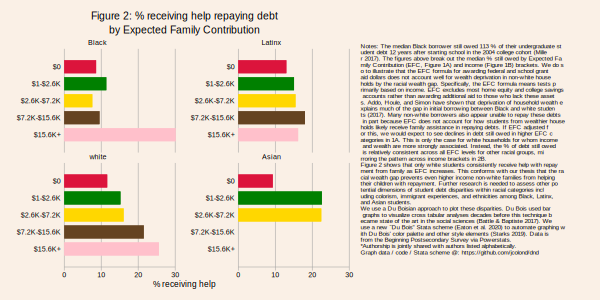

In [16]:
graph hbar pcthelp, `over' `xsize' `t2title' `note1' `t1title'

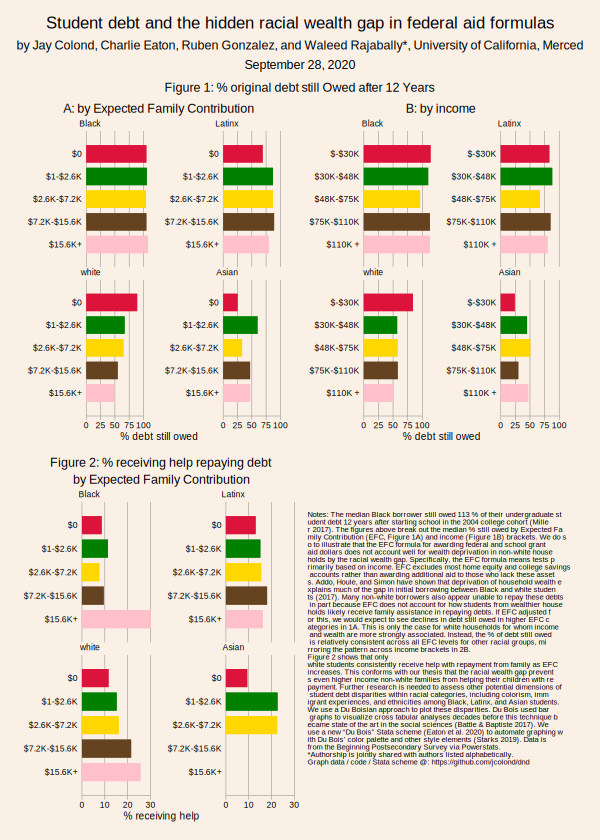

In [14]:
local title title(Student debt and the hidden racial wealth gap in federal aid formulas, size(small))
local subtitle subtitle("by Jay Colond, Charlie Eaton, Ruben Gonzalez, and Waleed Rajabally*, University of California, Merced", size(vsmall))
local t2title t2title("September 28, 2020", size(vsmall)) iscale(.6) rows(2) xsize(10) ysize(14) imargin(small)
graph combine AGIEFC PCTHELP, `title' `subtitle' `t2title'